# DENOISING
By: Shawn Vosburg (260743167)  
Due: October 8th, 2018  
Class: ECSE 415, McGill University  
Assignment 1, denoising.ipynb  


# Question 1.1 (Setup)
*Importing input images and displaying them on screen for visualization.*

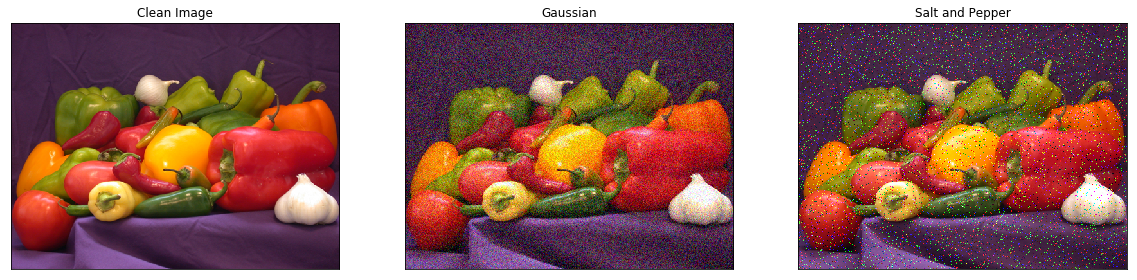

In [2]:
#Q1.1
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import skimage.measure as sk
peppers = cv2.imread('peppers.png',cv2.IMREAD_COLOR);
peppers_gaussian_noise = cv2.imread('gaussian_noise_peppers.png',cv2.IMREAD_COLOR);
peppers_saltandpepper_noise = cv2.imread('saltandpepper_noise_peppers.png',cv2.IMREAD_COLOR);

peppers_plt = cv2.cvtColor(peppers, cv2.COLOR_BGR2RGB)
peppers_gaussian_noise_plt = cv2.cvtColor(peppers_gaussian_noise, cv2.COLOR_BGR2RGB)
peppers_saltandpepper_noise_plt = cv2.cvtColor(peppers_saltandpepper_noise, cv2.COLOR_BGR2RGB)
# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(peppers_plt)
plt.title("Clean Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(peppers_gaussian_noise_plt)
plt.title("Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(peppers_saltandpepper_noise_plt)
plt.title("Salt and Pepper"), plt.xticks([]), plt.yticks([])
plt.show()



## Question 1.1-1
*Filter the noisy image using a 7 × 7 Gaussian filter with variance equals
to 2.*

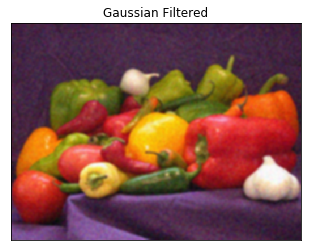

In [9]:
#Q1.1 1)
peppersGaussianFiltered_GaussianNoise = cv2.GaussianBlur(peppers_gaussian_noise,(7,7),sigmaX = 2, sigmaY = 2)
peppersGaussianFiltered_GaussianNoise_plt = cv2.cvtColor(peppersGaussianFiltered_GaussianNoise, cv2.COLOR_BGR2RGB)
plt.imshow(peppersGaussianFiltered_GaussianNoise_plt), plt.title('Gaussian Filtered')
plt.xticks([]), plt.yticks([])
plt.show()


## Question 1.1-2
*Filter the noisy image using a box filter of the same size.*

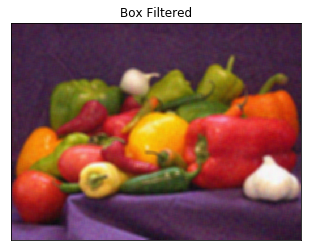

In [10]:
#Q1.1 2)
kernel = np.ones((7,7), np.float32)/(7*7)
peppersBoxFiltered_GaussianNoise = cv2.filter2D(peppers_gaussian_noise, -1, kernel)
peppersBoxFiltered_GaussianNoise_plt = cv2.cvtColor(peppersBoxFiltered_GaussianNoise, cv2.COLOR_BGR2RGB)
plt.imshow(peppersBoxFiltered_GaussianNoise_plt), plt.title('Box Filtered')
plt.xticks([]), plt.yticks([])
plt.show()

## Question 1.1-3
*Compare the PSNR of both of the denoised images to that of the clean
image and state which method gives the superior result.*

In [21]:
#Q1.1 3)
def psnr(img1, img2):
    #MeanSquareAverage = np.mean( (img1 - img2) ** 2 )
    #if MeanSquareAverage == 0:
    #    return 100
    #MaximumPixelValue = 255.0 #This is because the image maximum value is 255 (8 bit image)
    #return 10 * math.log10(MaximumPixelValue **2 / MeanSquareAverage)
    
    #Using skimage library
    return sk.compare_psnr(img1,img2);
    
#Denoised Gaussian Image PSNR
PSNRGaussianFiltered = psnr(peppersGaussianFiltered_GaussianNoise,peppers)
print("The PSNR of the Gaussian Filtered, Gaussian Noisy image is : ", PSNRGaussianFiltered,"dB.")

#Denoised Box Filtered PSNR
PSNRBoxFiltered = psnr(peppersBoxFiltered_GaussianNoise,peppers)
print("The PSNR of the Box Filtered, Gaussian Noisy image is : ", PSNRBoxFiltered,"dB.")

The PSNR of the Gaussian Filtered, Gaussian Noisy image is :  29.42329662137037 dB.
The PSNR of the Box Filtered, Gaussian Noisy image is :  28.278396476904042 dB.




Answer: If we were to take PSNR as a confident measure of picture quality, a high PSNR would signify a greater image quality as the Mean Square Error is low. Therefore, the Gaussian Filter produces a better image quality as it has a greater PSNR than the Box Filter.


## Question 1.1-4
*Filter the salt&pepper noisy image using the same Gaussian filter as used in the previous
question.*

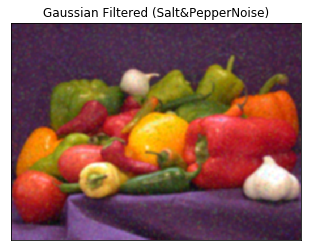

In [6]:
#Q1.1 4)
peppersGaussianFiltered_SaltandpepperNoise = cv2.GaussianBlur(peppers_saltandpepper_noise,(7,7),sigmaX = 2, sigmaY = 2)
peppersGaussianFiltered_SaltandpepperNoise_plt = cv2.cvtColor(peppersGaussianFiltered_SaltandpepperNoise, cv2.COLOR_BGR2RGB)
plt.imshow(peppersGaussianFiltered_SaltandpepperNoise_plt), plt.title('Gaussian Filtered (Salt&PepperNoise)')
plt.xticks([]), plt.yticks([])
plt.show()

## Question 1.1-5
*Filter the noisy image using a median filter of the same size.*

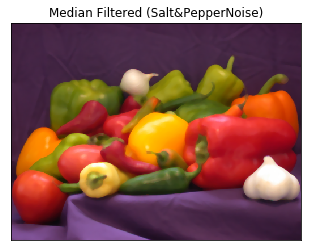

In [7]:
#Q1.1 5)
peppersMedFiltered_SaltandpepperNoise = cv2.medianBlur(peppers_saltandpepper_noise, 7)
peppersMedFiltered_SaltandpepperNoise_plt = cv2.cvtColor(peppersMedFiltered_SaltandpepperNoise, cv2.COLOR_BGR2RGB)
plt.imshow(peppersMedFiltered_SaltandpepperNoise_plt), plt.title('Median Filtered (Salt&PepperNoise)')
plt.xticks([]), plt.yticks([])
plt.show()

## Question 1.1-6
*Compare the PSNR of both of the denoised images to that of the clean
image and state which method gives a better result.*

In [8]:
#Q1.1 6)
def psnr(img1, img2):
    #MeanSquareAverage = np.mean( (img1 - img2) ** 2 )
    #if MeanSquareAverage == 0:
    #    return 100
    #MaximumPixelValue = 255.0 #This is because the image maximum value is 255 (8 bit image)
    #return 10 * math.log10(MaximumPixelValue **2 / MeanSquareAverage)
    
    #Using skimage library
    return sk.compare_psnr(img1,img2);

#Denoised Gaussian Image PSNR
PSNRGaussianFiltered = psnr(peppersGaussianFiltered_SaltandpepperNoise,peppers)
print("The PSNR of the Gaussian Filtered, Gaussian Noisy image is : ", PSNRGaussianFiltered,"dB.")

#Denoised Box Filtered PSNR
PSNRBoxFiltered = psnr(peppersMedFiltered_SaltandpepperNoise,peppers)
print("The PSNR of the Box Filtered, Gaussian Noisy image is : ", PSNRBoxFiltered,"dB.")


The PSNR of the Gaussian Filtered, Gaussian Noisy image is :  28.16493770977665 dB.
The PSNR of the Box Filtered, Gaussian Noisy image is :  31.871009920638333 dB.


**Answer**: If we were to take PSNR as a confident measure of picture quality, a high PSNR would signify a greater image quality as the Mean Square Error is low. Therefore, the **Median** Filter produces a better image quality as it has a greater PSNR than the Box Filter